![](https://www.complexityexplorer.org/assets/logo-0648a26b449617269a5781d6cce055e46eac5b625f8659f55957b01a2967e4f3.svg)
# Santa Fe Institute
## Complexity Explorer
Introduction - Maps I

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def logistic_map(n, x0, r):
    """
    This function is returning values afor a given logistic map
    after n iterations with an initial state x0 and a parameter r.
    """
    x = [x0]
    for iteration in range(n):
        x.append(r * x[-1] * (1-x[-1]))
    return np.array(x)

In [3]:
n = 200
x0_1 = 0.2
x0_2 = 0.200001
r = 2

x_n = logistic_map(n, x0_1, r)
xhat_n = logistic_map(n, x0_2, r)

diff = x_n - xhat_n

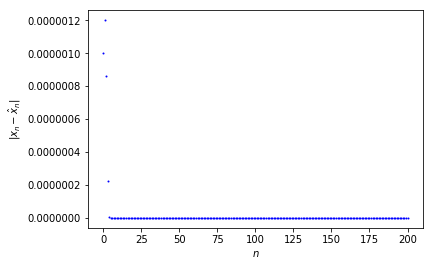

In [4]:
plt.figure()

plt.plot(abs(x_n-xhat_n), 'bo', markersize=1)

plt.xlabel('$n$')
plt.ylabel('$|x_n - \hat{x}_n|$');

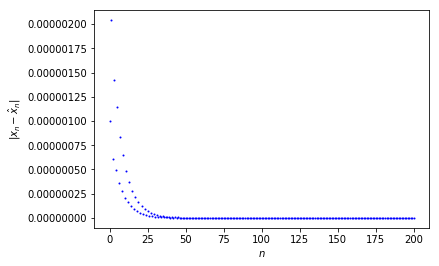

In [5]:
n = 200
x0_1 = 0.2
x0_2 = 0.200001
r = 3.4

x_n = logistic_map(n, x0_1, r)
xhat_n = logistic_map(n, x0_2, r)

diff = x_n - xhat_n

plt.figure()

plt.plot(abs(x_n-xhat_n), 'bo', markersize=1)

plt.xlabel('$n$')
plt.ylabel('$|x_n - \hat{x}_n|$');

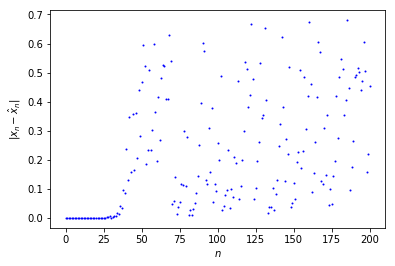

In [6]:
n = 200
x_0 = 0.2
xhat_0 = 0.200001
r = 3.72

x_n = logistic_map(n, x_0, r)
xhat_n = logistic_map(n, xhat_0, r)

diff = x_n - xhat_n

plt.figure()

plt.plot(abs(x_n-xhat_n), 'bo', markersize=1)

plt.xlabel('$n$')
plt.ylabel('$|x_n - \hat{x}_n|$');

**What is the overall difference between these plots, if any?  Do any of them seem to exhibit sensitive dependence on initial conditions?  What does this mean about the underlying dynamics of each r value?**

These plots has different behaviors, different outcomes. The last one seems to have higher dependence to initial conditions as the difference between $x_0$ and $\hat{x}_0$ is really small. The *r* parameter may manipulate sensitivity to initial conditions.

In [7]:
n = 500
r = 2
x_n = logistic_map(n, x_0, r)
xhat_n = logistic_map(n, xhat_0, r)

print(abs(x_n[n]-xhat_n[n]))

5.551115123125783e-17


In [8]:
n = 500
r = 3.4
x_n = logistic_map(n, x_0, r)
xhat_n = logistic_map(n, xhat_0, r)

print(abs(x_n[n]-xhat_n[n]))

0.0


$$ \frac{1}{n} \sum_{j}^{n} |x_j-\hat{x}_j|$$

In [9]:
n = 5000
r = 3.72
x_n = logistic_map(n, x_0, r)
xhat_n = logistic_map(n, xhat_0, r)

x = 0
for j in range(n):
    x += abs(x_n[j]-xhat_n[j])

result = 1/n * x

print(result)

0.2436323087079962


In [10]:
n = 500000
r = 3.72
x_n = logistic_map(n, x_0, r)
xhat_n = logistic_map(n, xhat_0, r)

x = 0
for j in range(n):
    x += abs(x_n[j]-xhat_n[j])

result = 1/n * x

print(result)

0.24406660586145898


https://www.complexityexplorer.org/courses/94-nonlinear-dynamics-mathematical-and-computational-approaches/segments/7985
**Generate a 50-point trajectory of the logistic map starting at $x_0 = 0.2$ using parameter value r = 3.68725.  What kind of dynamics does this appear to be?**

At first sight, it seems chaotic.

**What if you click "Start Animation" and watch for a while.  Does your conclusion change?  Wait for a while until something changes.  What kind of dynamics is this?**

This is a periodic orbit with 9 cycles.

**Set r = 3.828, plot 50 iterates, and click "Start Animation."  Raise r slowly to 3.8285, remembering to click "Restart Simulation" after each change. For $r \in (3.828, 3.8285)$ the dynamics are very deceiving -- be patient!  Describe & explain what you see.  If you don't see anything interesting, you aren't being patient enough.**

For $r = 3.828$, there are a lot of bifurcations betweens really short phases of stability toward attractors. As we move close to $r = 3.8285$, stable phases are becoming longer. For $r = 3.8285$, we are achieving a stable state with a periodic cycle with 3 cycles. 

**In Quiz 1.5 you estimated the $r$ value for which the dynamics bifurcated from a fixed point to a 2-cycle. 
Try to analytically find this number: i.e., start with $x_n=x_{n+2}$ and solve for the first $r$ that makes this valid.  Warning: this problem involves a significant amount of algebra and factoring.**

In [11]:
n = 52
x_0 = 0.2
rtest = np.arange(0.1, 3.5, 0.1)

for rn in range(len(rtest)):
    x_n = logistic_map(n, x_0, rtest[rn])
    cycle2 = False
    for x in range(n-2):
        cycle2 = x_n[x] != x_n[x+1] and x_n[x] == x_n[x+2]
        if cycle2:
            print('x_n =', x_n[x])
            print('x_n+1 =', x_n[x+1])
            print('x_n+2 =', x_n[x+2])
            break
    if (cycle2): print('r =', rtest[rn])

x_n = 0.5454545454545455
x_n+1 = 0.5454545454545454
x_n+2 = 0.5454545454545455
r = 2.2
x_n = 0.5833333333333335
x_n+1 = 0.5833333333333334
x_n+2 = 0.5833333333333335
r = 2.4000000000000004
x_n = 0.7994554904673701
x_n+1 = 0.5130445095326298
x_n+2 = 0.7994554904673701
r = 3.2


The first and the second return value of r are probably errors due to averaging of values. I should probably add something like a threshold.

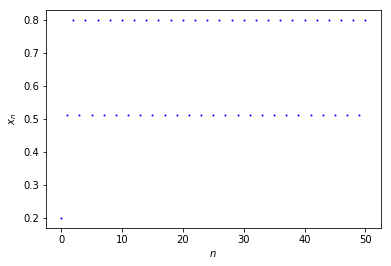

In [12]:
n = 50
x_0 = 0.2
r = 3.2

x_n = logistic_map(n, x_0, r)

plt.figure()
plt.plot(x_n, 'bo', markersize=1)
plt.xlabel('$n$')
plt.ylabel('$x_n$');